In [6]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

Для начала подготовим датасет (X,y):
Т.е. у нас есть 1797 объектов, у которых есть 64 признака, меняющихся от 0 до 16ти. Это оцифровка рукописных циферок. И есть метки клссов - это то, что там реально записано. Нужно обучить дерево решений, чтобы оно верно эти циферки распозновало.

In [2]:
Dig = load_digits()
print(Dig.keys())
X = Dig.data
y = Dig.target
print(X.shape)
#print(Dig.DESCR)
print(X[2,:])

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64)
[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]


In [3]:
regressor = RandomForestClassifier()
CV = cross_val_score(regressor,X,y,cv=10,n_jobs=2)

In [4]:
print(CV)
print(CV.mean())

[0.89444444 0.96666667 0.96666667 0.93333333 0.97777778 0.97777778
 0.97222222 0.96648045 0.91620112 0.93296089]
0.9504531346989447


<H2>Решаем задания</H2>

In [11]:
CV.mean()

0.8307883302296709

In [13]:
clf = DecisionTreeClassifier()
CV = cross_val_score(clf,X,y,cv=10,n_jobs=2)
print('ответ на задание 1 =',CV.mean())
print(CV)
with open("c:/MatkivskiyV/study/2course/week4/t1.txt", "w") as fout:
    fout.write(str(CV.mean()))

ответ на задание 1 = 0.8224705152079453
[0.81111111 0.82777778 0.81111111 0.80555556 0.77222222 0.87777778
 0.87222222 0.79329609 0.82681564 0.82681564]


In [14]:
#Задание2
clfb = BaggingClassifier(clf,n_estimators=100)
CVb = cross_val_score(clfb,X,y,cv=10,n_jobs=2)
print(CVb)
print('ответ на задание 2 =',CVb.mean())
with open("c:/MatkivskiyV/study/2course/week4/t2.txt", "w") as fout:
    fout.write(str(CVb.mean()))

[0.88333333 0.96111111 0.90555556 0.92777778 0.92777778 0.98888889
 0.96111111 0.92178771 0.87709497 0.91061453]
ответ на задание 2 = 0.9265052762259465


In [15]:
#Задание3
clfb_m8 = BaggingClassifier(clf,n_estimators=100,max_features=8)
CVb_m8 = cross_val_score(clfb_m8,X,y,cv=10,n_jobs=2)
print(CVb_m8)
print('ответ на задание 3 =',CVb_m8.mean())
with open("c:/MatkivskiyV/study/2course/week4/t3.txt", "w") as fout:
    fout.write(str(CVb_m8.mean()))

[0.9        0.96666667 0.89444444 0.88333333 0.95       0.95
 0.96111111 0.98324022 0.88826816 0.91620112]
ответ на задание 3 = 0.9293265052762258


In [16]:
#Задание4
clf_m8 = DecisionTreeClassifier(max_features=8)
clfb_m8 = BaggingClassifier(clf_m8,n_estimators=100)
CVbm_8 = cross_val_score(clfb_m8,X,y,cv=10,n_jobs=2)
print(CVbm_8)
print('ответ на задание 4 =',CVbm_8.mean())
with open("c:/MatkivskiyV/study/2course/week4/t4.txt", "w") as fout:
    fout.write(str(CVbm_8.mean()))

[0.9        0.96666667 0.95555556 0.90555556 0.97222222 0.96111111
 0.97777778 0.96648045 0.94413408 0.93296089]
ответ на задание 4 = 0.9482464307883302


<h3>Играем с random forest</h3>

Как влияет на качество алгоритма:
1. Количество деревьев
2. Количество признаков
3. Ограничение на глубину деревьев

In [16]:
#Давайте построим поиск по сетке и оттуда попробуем получить нужные параметры
param_grid = {'max_depth': [2,5,10,15,25,50,100],'n_jobs': [2],
              'max_features': [2,8,16,32,64],'n_estimators': [1,10,25,50,100]}

clf_RF = RandomForestClassifier()
optimizer = GridSearchCV(clf_RF,param_grid,cv=5)

In [17]:
optimizer.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [45]:
optimizer.cv_results_['mean_test_score']
print(optimizer.best_params_)

clf_RF = RandomForestClassifier(n_estimators=100,max_features=2,n_jobs=2)
optimizer_max_depth = GridSearchCV(clf_RF,{'max_depth': [2,5,10,15,25,50,100]},cv=5)

clf_RF = RandomForestClassifier(max_depth=25,n_estimators=100,n_jobs=2)
optimizer_max_features = GridSearchCV(clf_RF,{'max_features': [2,8,16,32,64]},cv=5)

clf_RF = RandomForestClassifier(max_depth=25,max_features=2,n_jobs=2)
optimizer_n_estimators = GridSearchCV(clf_RF,{'n_estimators': [1,10,25,50,100]},cv=5)


{'max_depth': 25, 'max_features': 2, 'n_estimators': 100, 'n_jobs': 2}


In [46]:
%%time
optimizer_max_depth.fit(X,y)
optimizer_max_features.fit(X,y)
optimizer_n_estimators.fit(X,y)

Wall time: 42.8 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=25,
                                              max_features=2,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=2,
                                              oob_score=False,
                                              random_state=No

Text(0.5, 1.0, 'n_estimators')

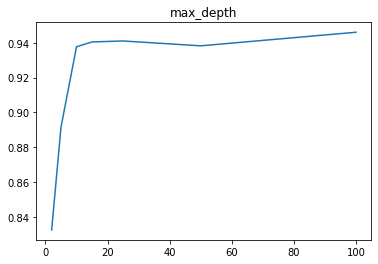

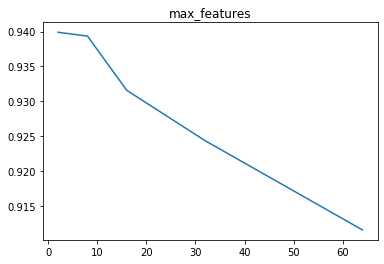

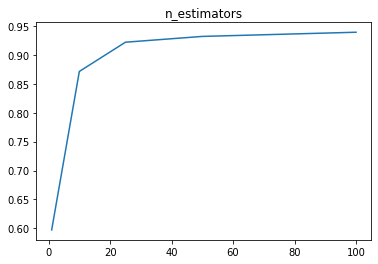

In [51]:
import matplotlib.pyplot as plt
plt.figure(); plt.plot([2,5,10,15,25,50,100],optimizer_max_depth.cv_results_['mean_test_score'])
plt.title('max_depth')
plt.figure(); plt.plot([2,8,16,32,64],optimizer_max_features.cv_results_['mean_test_score'])
plt.title('max_features')
plt.figure(); plt.plot([1,10,25,50,100],optimizer_n_estimators.cv_results_['mean_test_score'])
plt.title('n_estimators')

Ответы на вопросы: 2 3 4 7